## Pandas class exercises

### 1.1 wrap the data above in a pandas DataFrame 
in a way that printing the dataframe and its index and column attributes gives this result: (Hint: print(df);print(df.index);print(df.columns): 

In [2]:
import numpy as np
import pandas as pd
data = np.array([['','Col1','Col2','col3'],
                ['Row1',1,2,3],
                ['Row2',4,5,6],
                ['Row3',7,8,9]])
print(type(data))
print('first data cell',type(data[1,1]))
print('nd array data type:',data.dtype) # <U4 a unicode string of 4 characters
df = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])
print(df)

<class 'numpy.ndarray'>
first data cell <class 'numpy.str_'>
nd array data type: <U4
     Col1 Col2 col3
Row1    1    2    3
Row2    4    5    6
Row3    7    8    9


### 1.2 Make slices of data:
   1. second column using column name
   2. third column using column index (.iloc[])
   3. slice element at third row of second column (use .iloc())

In [3]:
# 1
print('1:\n',df['Col2'])
# 2
print('2:\n',df.iloc[:,2])
# 3
print('3:\n',df.iloc[2,1]) # third row, second column

1:
 Row1    2
Row2    5
Row3    8
Name: Col2, dtype: object
2:
 Row1    3
Row2    6
Row3    9
Name: col3, dtype: object
3:
 8


## Class ex 2 Pandas Series: CO2 emissions

In [4]:
# 1: Create a Pandas Series with emission data from 2014 for each country or region
data = pd.read_csv('../../../data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_887574.csv', skiprows=4)
#print(data)
data = data.set_index('Country Name')
#print(data)
type(data['2014'])

pandas.core.series.Series

In [5]:
# 2: Find the 10 Countries/Regions with the highest emissions in 2014 and show emission numbers (reverse sorted)
sorted_2014 = data['2014'].sort_values(ascending=False)
sorted_2014[:10]

Country Name
World                        3.613828e+07
IDA & IBRD total             2.158385e+07
Low & middle income          2.121377e+07
Middle income                2.101174e+07
IBRD only                    2.078336e+07
Upper middle income          1.682714e+07
Late-demographic dividend    1.508966e+07
East Asia & Pacific          1.427211e+07
High income                  1.293972e+07
OECD members                 1.215111e+07
Name: 2014, dtype: float64

In [6]:
# remove regions and aggregations
countries = pd.read_csv('../../../data/country_codes.csv', sep='\t', header=None)
alpha3 = countries[2].str.strip()
alpha3 = list(alpha3)
print(alpha3[:4])
filtered_data = data[data['Country Code'].isin(alpha3)]
filtered_data['2014'].sort_values(ascending=False)[:10]

['AFG', 'ALB', 'DZA', 'ASM']


Country Name
China                 1.029193e+07
United States         5.254279e+06
India                 2.238377e+06
Russian Federation    1.705346e+06
Japan                 1.214048e+06
Germany               7.198834e+05
Iran, Islamic Rep.    6.494807e+05
Saudi Arabia          6.010470e+05
Korea, Rep.           5.871564e+05
Canada                5.371935e+05
Name: 2014, dtype: float64

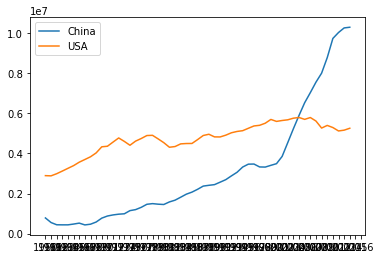

In [7]:
# Plot the emissions of China and USA over time respectively
import matplotlib.pyplot as plt
china = data.loc['China'][3:]
usa = data.loc['United States'][3:]
plt.plot(china.index, china, label='China')
plt.plot(usa.index, usa, label='USA')
plt.legend()

## 03 Exercise pandas dataframe

- Using the dataframe in the above cell find:
  1. Mean, Min, Max values for all 4 columns
  2. The 2 dates with the largest and smallest sum (by column)
  3. All A's and B's that are both positive

In [19]:
# 1
dates = pd.date_range('20200602', periods=6) # create 6 dates from september 2nd, 2020.
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) # use np.random.randn to generate a dataframe of 6 by 4 random numbers
print(df)
df.describe()

                   A         B         C         D
2020-06-02 -0.045701 -0.708604 -1.313964 -1.060453
2020-06-03 -0.681167  0.362291  0.047233 -0.093536
2020-06-04 -0.218327  1.064815 -0.524518 -0.319508
2020-06-05  1.213492  0.524042 -0.271572 -0.345053
2020-06-06 -0.254965 -1.860359 -0.734746 -1.618253
2020-06-07 -0.124426 -0.819485 -0.094189  0.248733


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.018516,-0.239550,-0.481959,-0.531345
std,0.642610,1.079816,0.496511,0.684266
min,-0.681167,-1.860359,-1.313964,-1.618253
25%,-0.245806,-0.791764,-0.682189,-0.881603
50%,-0.171377,-0.173156,-0.398045,-0.332281
75%,-0.065383,0.483604,-0.138534,-0.150029
max,1.213492,1.064815,0.047233,0.248733


In [20]:
# 2
summed_horizontal_sorted = df.sum(axis=1).sort_values()
summed_horizontal_sorted

2020-06-06   -4.468323
2020-06-02   -3.128722
2020-06-07   -0.789367
2020-06-03   -0.365179
2020-06-04    0.002461
2020-06-05    1.120909
dtype: float64

In [21]:
smallest = summed_horizontal_sorted.index[0]
largest = summed_horizontal_sorted.index[-1]
print(f'smallest sum was by date: {smallest} and largest by {largest}')

smallest sum was by date: 2020-06-06 00:00:00 and largest by 2020-06-05 00:00:00


In [30]:
# 3 all As and Bs that are positive
as_and_bs = df[['A','B']]
as_and_bs

,A,B
2020-06-02,-0.045701,-0.708604
2020-06-03,-0.681167,0.362291
2020-06-04,-0.218327,1.064815
2020-06-05,1.213492,0.524042
2020-06-06,-0.254965,-1.860359
2020-06-07,-0.124426,-0.819485


In [44]:
filter = as_and_bs[as_and_bs > 0] #write NaN in all cells that are not validated by the condition
print(filter,'\n')
# NaN is evaluated to True (since it is non empty) therefore we change NaN to False
filter_na = filter.notna()
print(filter_na,'\n')
bool_filter_any = filter_na.any(axis=1)
print(bool_filter_any,'\n')
bool_filter_all = filter_na.all(axis=1)
print(bool_filter_all,'\n')
print('ANY: ',as_and_bs[bool_filter_any],'\n')
print('ALL: ',as_and_bs[bool_filter_all],'\n')

                   A         B
2020-06-02       NaN       NaN
2020-06-03       NaN  0.362291
2020-06-04       NaN  1.064815
2020-06-05  1.213492  0.524042
2020-06-06       NaN       NaN
2020-06-07       NaN       NaN 

                A      B
2020-06-02  False  False
2020-06-03  False   True
2020-06-04  False   True
2020-06-05   True   True
2020-06-06  False  False
2020-06-07  False  False 

2020-06-02    False
2020-06-03     True
2020-06-04     True
2020-06-05     True
2020-06-06    False
2020-06-07    False
Freq: D, dtype: bool 

2020-06-02    False
2020-06-03    False
2020-06-04    False
2020-06-05     True
2020-06-06    False
2020-06-07    False
Freq: D, dtype: bool 

ANY:                     A         B
2020-06-03 -0.681167  0.362291
2020-06-04 -0.218327  1.064815
2020-06-05  1.213492  0.524042 

ALL:                     A         B
2020-06-05  1.213492  0.524042 



## 04 Class Exercise
#### Find military expenditure pr. capita.

Go here and get data as csv: [worldbank military expanditure](https://databank.worldbank.org/reports.aspx?source=2&series=MS.MIL.XPND.CD&country=#). Download it manually, unzip the csv and clean up empty rows.  
1. Use .replace() method on the dataframe to remove all data containing '..'
2. Set index of the dataframe to be 'Country Name'
3. Slice the 2019 column data to get a data series.
4. Make data numeric (pd.to_numeric(data_series))

1. For 2019 find the 10 countries with the highest military expenditure in USD
2. For 2019 find the 10 countries with the highest military expenditure per capita. Find the population data here: [worldbank](https://databank.worldbank.org/source/world-development-indicators/preview/on#)(use series='Population,Total' and time='2019' and Country= countries (217)) **or** use [copy paste with this date into excel](https://www.worldometers.info/world-population/population-by-country/)
  - (Hint: use pd.merge() to merge the mil_exp dataframe with the population dataframe on 2 columns (country_code)
3. For 2019 find the 3 countries with the highest per capita military expenditure in the middle east
  - [countries list with iso code](middleeast_countries.csv) or use:   
  `list_of_middle_eastern = ['YEM','ARE','TUR','SYR','SAU','QAT','PSE','OMN','LBN','KWT','JOR','ISR','IRQ','IRN','EGY','CYP','BHR']
`

In [93]:
# 1-5 First downloaded zip file manually, unzipped and removed empty rows in bottom of file
data = pd.read_csv('../../../data/mil_exp.csv')
data_only_countries = data[data['Country Code'].isin(alpha3)] 
data = data_only_countries.set_index(data_only_countries['Country Name'])
data2019 = data['2019 [YR2019]'].str.strip() # remove white space in order to find data cells with '..' inside
print(len(list(data2019)))
data2019 = data2019.replace('..',None)
print(len(list(data2019)))
data2019 = pd.to_numeric(data2019)
data2019.sort_values(ascending=False)[:10]

215
215


Country Name
United States         7.317514e+11
China                 2.610819e+11
India                 7.112498e+10
Russian Federation    6.510257e+10
Saudi Arabia          6.186667e+10
French Polynesia      5.011893e+10
France                5.011893e+10
Germany               4.927676e+10
United Kingdom        4.865038e+10
Japan                 4.760902e+10
Name: 2019 [YR2019], dtype: float64

In [115]:
# 6
population = pd.read_csv('../../../data/population_data.csv')[['Country Code','2019 [YR2019]']]
#population.columns = population.columns.str.strip()
#population.columns = population.columns.str.replace('2019 [YR2019]','population')
population.columns = ['Country Code','Population']
population.

,Country Code,population
0,AFG,38041754
1,ALB,2854191
2,DZA,43053054
3,ASM,55312
4,AND,77142
...,...,...
217,NaN,NaN
218,NaN,NaN
219,NaN,NaN
220,NaN,NaN


In [123]:
# 6 fortsat 
data_merged = pd.merge(data[['Country Name','Country Code', '2019 [YR2019]']], population,on='Country Code')
data_cleaned = data_merged.replace('..',None)
data_cleaned[['2019 [YR2019]','population']] = data_cleaned[['2019 [YR2019]','population']].apply(pd.to_numeric)
# Create a new column with expenditure divided by population
data_merged['expenditure pr. capita'] = data_cleaned['2019 [YR2019]']/data_cleaned['population']
data_cap_sorted = data_merged.sort_values(by='expenditure pr. capita', ascending=False)
data_cap_sorted[:10]

,Country Name,Country Code,2019 [YR2019],population,expenditure pr. capita
199,Tuvalu,TUV,..,11646,1.755771e+06
27,British Virgin Islands,VGB,..,30030,8.973000e+05
148,Palau,PLW,..,18008,5.695299e+05
198,Turks and Caicos Islands,TCA,..,38191,5.354065e+05
36,Cayman Islands,CYM,..,64948,3.417754e+05
170,Sint Maarten (Dutch part),SXM,..,40733,2.752345e+05
3,American Samoa,ASM,..,55312,1.862815e+05
68,French Polynesia,PYF,..,279287,1.794531e+05
4,Andorra,AND,..,77142,1.335667e+05
76,Greenland,GRL,..,56225,9.731548e+04


In [125]:
# 7
list_of_middle_eastern = ['YEM','ARE','TUR','SYR','SAU','QAT','PSE','OMN','LBN','KWT','JOR','ISR','IRQ','IRN','EGY','CYP','BHR']
middle_e = data_cap_sorted[data_cap_sorted['Country Code'].isin(list_of_middle_eastern)]
middle_e

,Country Name,Country Code,2019 [YR2019],population,expenditure pr. capita
94,Israel,ISR,20464927048.2604,9053300,2260.493637
104,Kuwait,KWT,7709786184.21053,4207083,1832.572874
164,Saudi Arabia,SAU,61866666666.6667,34268528,1805.349406
157,Qatar,QAT,..,2832067,1593.531160
146,Oman,OMN,6729518855.6567,4974986,1352.670913
14,Bahrain,BHR,1404787234.04255,1641172,855.965879
202,United Arab Emirates,ARE,..,9770529,535.173284
108,Lebanon,LBN,2521246648.01434,6855713,367.758488
50,Cyprus,CYP,401690550.828482,1198575,335.140105
187,Syrian Arab Republic,SYR,..,17070135,303.399736
